In [1]:
import numpy as np
import os
import helpers
import pickle
from matplotlib import pyplot as plt
from scipy import signal
from sklearn import preprocessing


In [2]:
#load in training data
labels = helpers.load_data("trainLabels.npy", "train")

#Smartglasses
jins_accel = helpers.load_data("trainJinsAccelerometer.npy", "train")
jins_gyro = helpers.load_data("trainJinsGyroscope.npy", "train")

#Smartwatch
ms_accel = helpers.load_data("trainMSAccelerometer.npy", "train")
ms_gyro = helpers.load_data("trainMSGyroscope.npy", "train")

#Smartphone
nx_gravity = helpers.load_data("trainGravity.npy", "train")
nx_magnet = helpers.load_data("trainMagnetometer.npy", "train")
nx_linAcc = helpers.load_data("trainLinearAcceleration.npy", "train")
nx_accel = helpers.load_data("trainAccelerometer.npy", "train")
nx_gyro = helpers.load_data("trainGyroscope.npy", "train")

In [3]:
#load in testing data
labels_test = helpers.load_data("testLabels.npy", "test")

#Smartglasses
jins_accel_test = helpers.load_data("testJinsAccelerometer.npy", "test")
jins_gyro_test = helpers.load_data("testJinsGyroscope.npy", "test")

#Smartwatch
ms_accel_test = helpers.load_data("testMSAccelerometer.npy", "test")
ms_gyro_test = helpers.load_data("testMSGyroscope.npy", "test")

#Smartphone
nx_gravity_test = helpers.load_data("testGravity.npy", "test")
nx_magnet_test = helpers.load_data("testMagnetometer.npy", "test")
nx_linAcc_test = helpers.load_data("testLinearAcceleration.npy", "test")
nx_accel_test = helpers.load_data("testAccelerometer.npy", "test")
nx_gyro_test = helpers.load_data("testGyroscope.npy", "test")

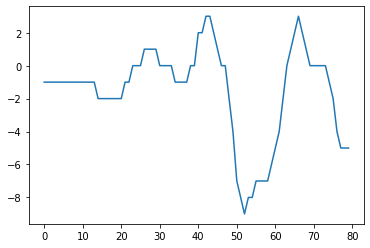

[]


In [4]:
y = jins_accel[0,:,0]
x = np.arange(0, y.shape[0], 1)
plt.plot(x,y)
plt.show()

t = np.argwhere(np.isnan(jins_accel))
print(t)

In [5]:
#preprocess training data
jins_accel = helpers.preprocess_data(jins_accel, sampling_type="resample")
jins_gyro = helpers.preprocess_data(jins_gyro, "resample")
ms_accel = helpers.preprocess_data(ms_accel, "resample") #actually getting downsampled, but using resample instead of decimates
ms_gyro = helpers.preprocess_data(ms_gyro, "resample")
nx_gravity = helpers.preprocess_data(nx_gravity)
nx_magnet = helpers.preprocess_data(nx_magnet) #not getting resampled, but still needs other preprocessing steps
nx_linAcc = helpers.preprocess_data(nx_linAcc)
nx_accel = helpers.preprocess_data(nx_accel)
nx_gyro = helpers.preprocess_data(nx_gyro)


C:\Users\wpsky\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\signal\_signaltools.py:1611: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)
C:\Users\wpsky\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\signal\_signaltools.py:1611: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)
C:\Users\wpsky\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\signal\_signaltools.py:1611: RuntimeWarning: invalid value encountered in true_divide
  res *= (1 - noise / lVar)


In [6]:
#preprocess test data
jins_accel_test = helpers.preprocess_data(jins_accel_test, sampling_type="resample")
jins_gyro_test = helpers.preprocess_data(jins_gyro_test, "resample")
ms_accel_test = helpers.preprocess_data(ms_accel_test, "resample") #actually getting downsampled, but using resample instead of decimates
ms_gyro_test = helpers.preprocess_data(ms_gyro_test, "resample")
nx_gravity_test = helpers.preprocess_data(nx_gravity_test)
nx_magnet_test = helpers.preprocess_data(nx_magnet_test) #not getting resampled, but still needs other preprocessing steps
nx_linAcc_test = helpers.preprocess_data(nx_linAcc_test)
nx_accel_test = helpers.preprocess_data(nx_accel_test)
nx_gyro_test = helpers.preprocess_data(nx_gyro_test)

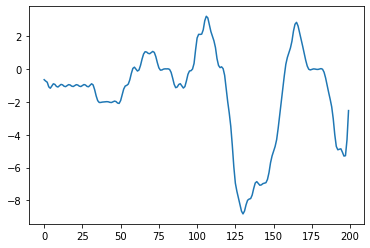

[[ 167    0    0]
 [ 167    1    0]
 [ 167    2    0]
 ...
 [1288  197    0]
 [1288  198    0]
 [1288  199    0]]


1600

In [7]:
y = jins_accel[0,:,0]
x = np.arange(0, y.shape[0], 1)
plt.plot(x,y)
plt.show()

t = np.argwhere(np.isnan(jins_accel))
print(t)
len(t)

In [8]:
train_data = np.stack((jins_gyro, ms_accel,ms_gyro, nx_gravity, nx_magnet, nx_linAcc, nx_accel, nx_gyro), axis = 1)

pickle.dump(train_data, open(r"data/train.pkl", "wb"))

pickle.dump(labels, open(r"data/labels.pkl", "wb"))

In [9]:
test_data = np.stack((jins_gyro_test, ms_accel_test, ms_gyro_test, nx_gravity_test, nx_magnet_test, nx_linAcc_test, nx_accel_test, nx_gyro_test), axis = 1)

pickle.dump(test_data, open(r"data/test.pkl", "wb"))
pickle.dump(labels_test, open(r"data/labels_test.pkl", "wb"))